# R Project
#### << Boston Housing Dataset >>
                                                                                            Deepam and Akash

In [57]:
library("tidyverse")
library("GGally")
library("corrplot")
library("reshape2")


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
boston_dataset <- read_csv("../datasets/BostonHousing.csv")

Rows: 506 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [65]:
head(boston_dataset)
cat("Features:")
names(boston_dataset)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Features:

[1] "CRIM"    "ZN"      "INDUS"   "CHAS"    "NOX"     "RM"      "AGE"    
 [8] "DIS"     "RAD"     "TAX"     "PTRATIO" "B"       "LSTAT"   "MEDV"

There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $\$10,000$
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - %lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [4]:
str(boston_dataset)

spec_tbl_df [506 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   CRIM 

In [6]:
summary(boston_dataset)


      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

# Data Cleaning

In [75]:
#library(Amelia)
#missmap(boston_dataset,col=c('yellow','black'),y.at=1,y.labels='',legend=TRUE)
colSums(is.na(boston_dataset))

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
      0       0       0       0       0       0       0       0       0       0 
PTRATIO       B   LSTAT    MEDV 
      0       0       0       0

# Exploratory Data Analysis


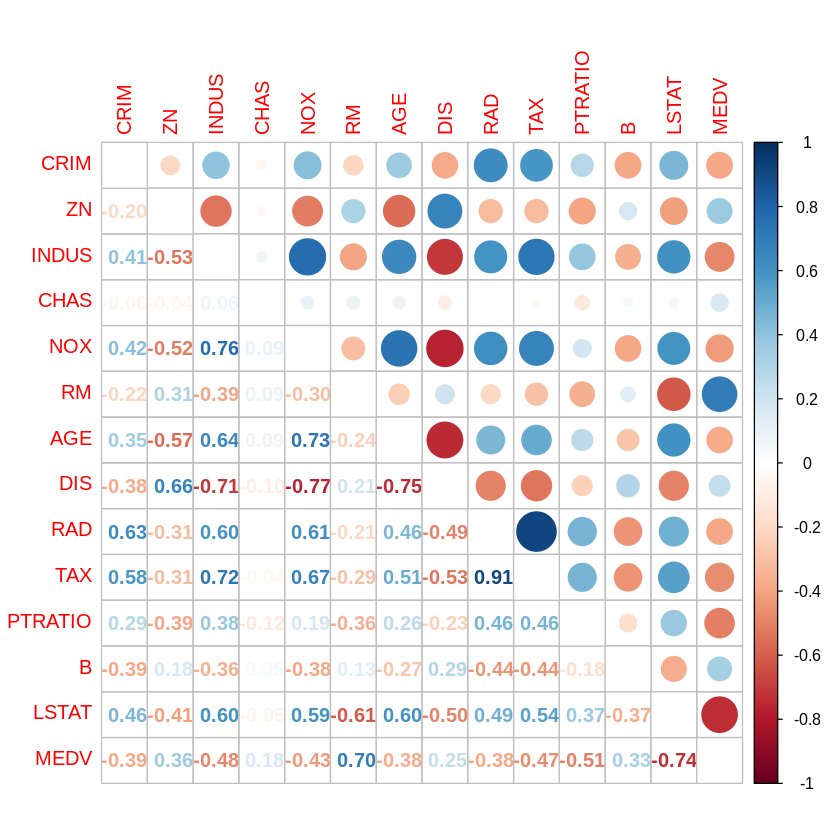

In [30]:
#ggcorr(data=boston_dataset, method = c("everything", "pearson"))
#ggpairs(data=select(boston_dataset,-CHAS), title="Boston Dataset with ggpairs()")
corrplot.mixed(cor(boston_dataset), lower="number", upper="circle",tl.pos = "lt")

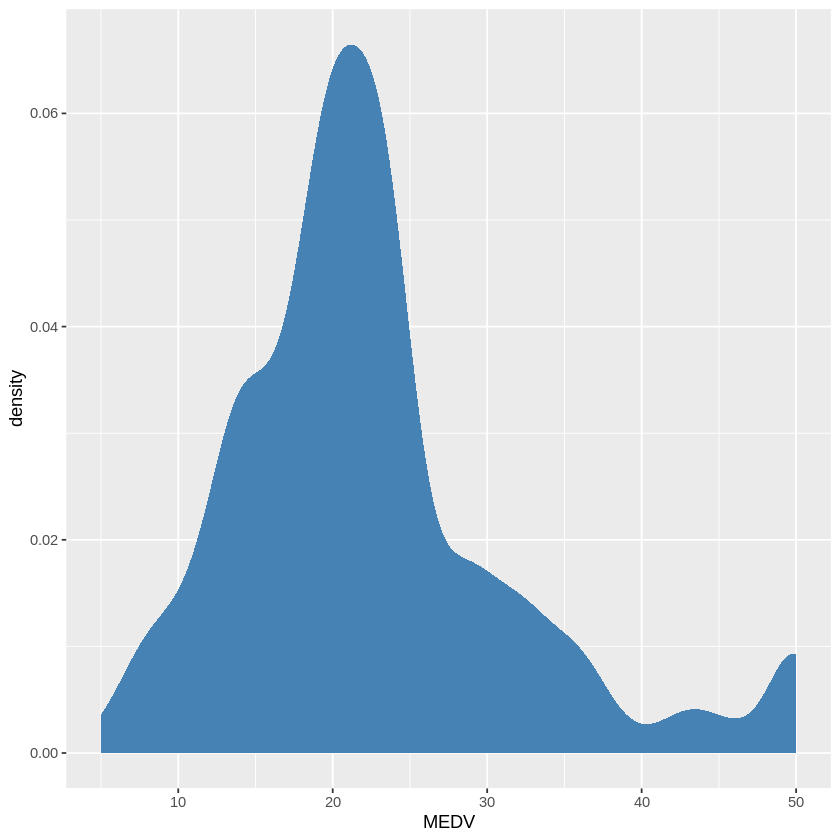

In [79]:
boston_dataset %>% 
  ggplot(aes(MEDV)) +
  stat_density(fill="steelblue")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 13”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  2.9038e-31”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 156.25”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.5”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 13”
Warning message in predLo

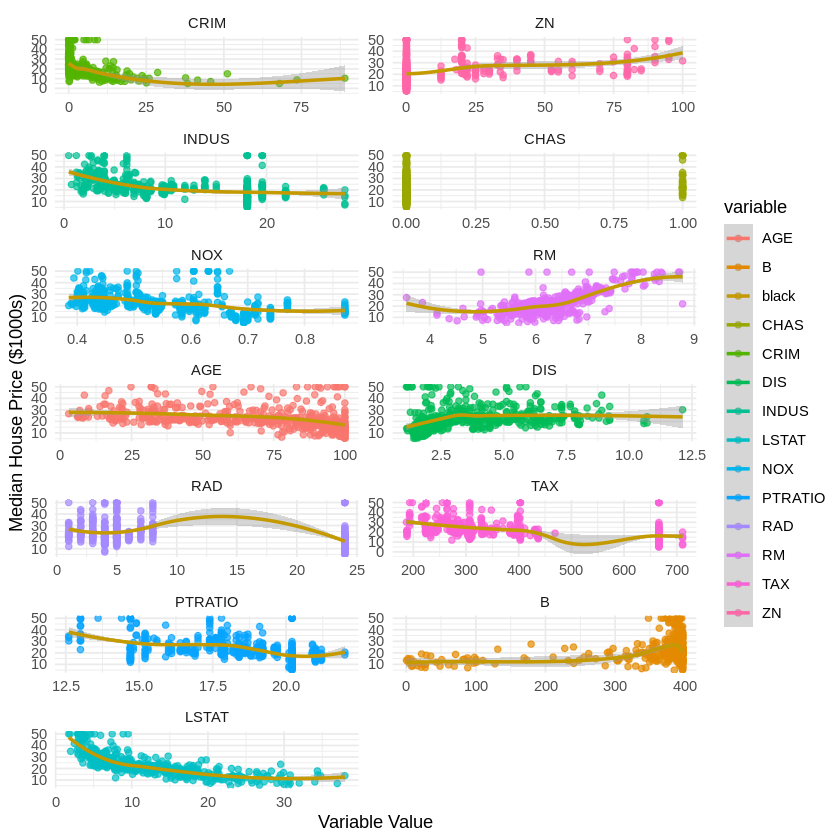

In [63]:
boston_dataset %>%
  melt(id.vars = "MEDV") %>%
  ggplot(aes(x = value, y = MEDV, colour = variable)) +
  geom_point(alpha = 0.7) +
  stat_smooth(aes(colour = "black")) +
  facet_wrap(~variable, scales = "free", ncol = 2) +
  labs(x = "Variable Value", y = "Median House Price ($1000s)") +
  theme_minimal()


# Principal Component Analysis

# Linear Regression Model

### Method 1: lm() from r-base

In [68]:
modelm <- lm(boston_dataset$MEDV ~ ., data =boston_dataset )
summary(modelm)



Call:
lm(formula = boston_dataset$MEDV ~ ., data = boston_dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
CRIM        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
ZN           4.642e-02  1.373e-02   3.382 0.000778 ***
INDUS        2.056e-02  6.150e-02   0.334 0.738288    
CHAS         2.687e+00  8.616e-01   3.118 0.001925 ** 
NOX         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
RM           3.810e+00  4.179e-01   9.116  < 2e-16 ***
AGE          6.922e-04  1.321e-02   0.052 0.958229    
DIS         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
RAD          3.060e-01  6.635e-02   4.613 5.07e-06 ***
TAX         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
PTRATIO     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
B            9.312e-03  2.686e-03   3.467 0.000573 ***
LSTAT       -5.248e-01  5.072e-02 -10.347  < 2e-16 **

----------------------------------------------------------------------
for uncleaned dataset:

----------------------------------------------------------------------

In [22]:
boston_dataset %>% filter((RAD) == 1)
##   Symbol              Name      Sector  Price Price.Earnings Dividend.Yield
## 1    AYI Acuity Brands Inc Industrials 145.41          18.22      0.3511853

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02187,60,2.93,0,0.4010,6.800,NA,6.2196,1,265,15.6,393.37,5.03,31.1
0.01439,60,2.93,0,0.4010,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1
0.04819,80,3.64,NA,0.3920,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
0.03548,80,3.64,0,0.3920,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9
0.01501,90,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
0.00906,90,2.97,0,0.4000,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
0.01096,55,2.25,0,0.3890,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
0.01965,80,1.76,0,0.3850,6.230,NA,9.0892,1,241,18.2,341.60,12.93,20.1


In [47]:
#removing null entries for charles river.
cleaned_data = boston_dataset
cleaned_data = cleaned_data[-which(is.na(cleaned_data$CHAS)),]

In [40]:
cleaned_data

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[149] 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0
[223] 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0
attr(,"na.action")
 [1]   7  10  15  44 120 153 207 241 246 255 295 368 377 389 402 443 451 466 480
[20] 483
attr(,"class")
[1] "omit"

In [49]:
# replacing the CRIM with its mean
cleaned_data$CRIM[is.na(cleaned_data$CRIM)]<-mean(cleaned_data$CRIM,na.rm=TRUE)


In [50]:
colSums(is.na(cleaned_data))

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
      0      20      19       0       0       0      20       0       0       0 
PTRATIO       B   LSTAT    MEDV 
      0       0      19       0

---------------------------------------------------------------------
> Using original clean dataset

---------------------------------------------------

In [3]:
boston_dataset <- read_csv("../datasets/BostonHousing.csv")

Rows: 506 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(boston_dataset)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
colSums(is.na(boston_dataset))

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
      0       0       0       0       0       0       0       0       0       0 
PTRATIO       B   LSTAT    MEDV 
      0       0       0       0